In [1]:
import pandas as pd
df = pd.read_csv('new_cleaned.csv')
df.head(1)

,CarName,fueltype,price,engine
0,alfa,gasoline,13495.0,0.13


In [2]:
# check nulls, duplicates, value counts, distrubution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CarName   205 non-null    object 
 1   fueltype  205 non-null    object 
 2   price     205 non-null    float64
 3   engine    205 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.5+ KB


In [3]:
df.duplicated().sum()

3

In [4]:
df.drop_duplicates(inplace=True)

In [ ]:
# no nulls
# drop 3 duplicates

In [6]:
len(df['CarName'].value_counts())

46

In [11]:
len(df['fueltype'].value_counts())

2

In [12]:
df['fueltype'].value_counts()

fueltype
gasoline    182
diesel       20
Name: count, dtype: int64

In [ ]:
# fuel type very weak feature

In [7]:
# 46 out of 202
46/202

0.22772277227722773

In [ ]:
# keep it!

<Axes: xlabel='price', ylabel='Count'>

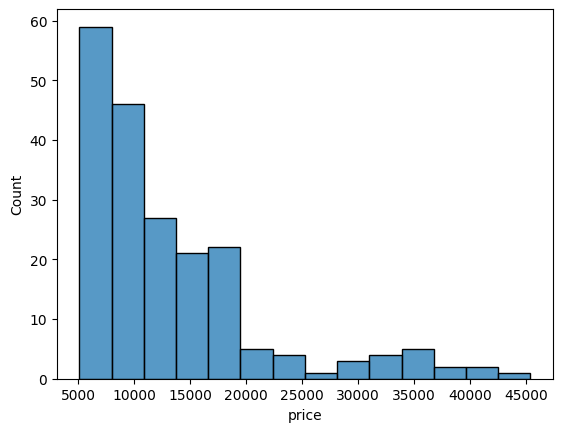

In [8]:
# show distrubution plot for price and engine
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='price')

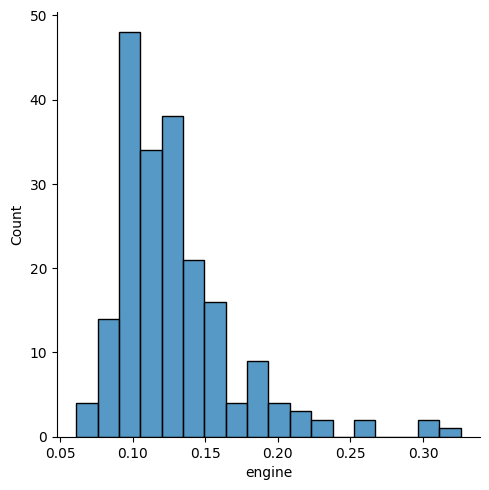

In [10]:
sns.displot(data=df, x='engine')

In [ ]:
# preprocess

In [ ]:
!pip install xgboost catboost lightgbm


In [ ]:
!pip install category_encoders


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
import category_encoders as ce

y = df['price']
X = df.drop(columns=['price'])

# Preprocessing
categorical_features = ['CarName', 'fueltype']

# Define transformers
binary_encoder = ce.BinaryEncoder(cols=['CarName'])
one_hot_encoder = OneHotEncoder()

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('CarName', binary_encoder, ['CarName']),
        ('fueltype', one_hot_encoder, ['fueltype'])
    ],
    remainder='passthrough'
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation setup
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Define models
models = {
    "LinearSVM": SVR(kernel='linear'),
    "NonLinearSVM": SVR(kernel='rbf'),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
    "CatBoost": cb.CatBoostRegressor(verbose=0),
    "LightGBM": lgb.LGBMRegressor()
}

# Evaluation
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2": r2, "RMSE": rmse}

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"R2: {metrics['R2']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}\n")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 161, number of used features: 6
[LightGBM] [Info] Start training from score 13060.354037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
# best model is LightGBM

In [23]:
# Test without the fueltype and car name
y = df['price']
X = df.drop(columns=['price','CarName', 'fueltype'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation setup
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Define models
models = {
    "LinearSVM": SVR(kernel='linear'),
    "NonLinearSVM": SVR(kernel='rbf'),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
    "CatBoost": cb.CatBoostRegressor(verbose=0),
    "LightGBM": lgb.LGBMRegressor()
}

# Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2": r2, "RMSE": rmse}

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"R2: {metrics['R2']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 161, number of used features: 1
[LightGBM] [Info] Start training from score 13060.354037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [24]:
y = df['price']
X = df.drop(columns=['price','fueltype'])

# Preprocessing
categorical_features = ['CarName']

# Define transformers
binary_encoder = ce.BinaryEncoder(cols=['CarName'])

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('CarName', binary_encoder, ['CarName']),
    ],
    remainder='passthrough'
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation setup
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Define models
models = {
    "LinearSVM": SVR(kernel='linear'),
    "NonLinearSVM": SVR(kernel='rbf'),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
    "CatBoost": cb.CatBoostRegressor(verbose=0),
    "LightGBM": lgb.LGBMRegressor()
}

# Evaluation
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2": r2, "RMSE": rmse}

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"R2: {metrics['R2']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}\n")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 161, number of used features: 6
[LightGBM] [Info] Start training from score 13060.354037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
# better to keep both features

In [ ]:
# best model is LightGBM -> tune then train on all data set

In [27]:
from sklearn.model_selection import GridSearchCV

y = df['price']
X = df.drop(columns=['price'])

# Preprocessing
categorical_features = ['CarName', 'fueltype']

# Define transformers
binary_encoder = ce.BinaryEncoder(cols=['CarName'])
one_hot_encoder = OneHotEncoder()

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('CarName', binary_encoder, ['CarName']),
        ('fueltype', one_hot_encoder, ['fueltype'])
    ],
    remainder='passthrough'
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM model with hyperparameter tuning
lightgbm_model = lgb.LGBMRegressor(silent=True)

param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator=lightgbm_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', grid_search)])

# Fit pipeline to training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best LightGBM Model R2: {r2:.4f}")
print(f"Best LightGBM Model RMSE: {rmse:.4f}")

# Retrain on the entire dataset with the best found parameters
best_params = grid_search.best_params_
final_model = lgb.LGBMRegressor(**best_params, silent=True)

# Create a final pipeline with the best model
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', final_model)])

# Fit the final pipeline to the entire dataset
final_pipeline.fit(X, y)

# Predict on the entire dataset
y_pred_full = final_pipeline.predict(X)
r2_full = r2_score(y, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y, y_pred_full))

print(f"Retrained LightGBM Model R2 on full data: {r2_full:.4f}")
print(f"Retrained LightGBM Model RMSE on full data: {rmse_full:.4f}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [28]:
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31}

In [29]:
import joblib

# Save the final pipeline to a file
joblib_file = "final_pipeline.pkl"
joblib.dump(final_pipeline, joblib_file)
print(f"Pipeline saved to {joblib_file}")


Pipeline saved to final_pipeline.pkl


In [33]:
def predict_new_data(new_data, model_file='newcars-pipe.pkl'):
    """
    Predict the price for a new data record using the saved pipeline.

    Parameters:
    - new_data (dict): A dictionary containing the feature values for the new data record.
    - model_file (str): The file path of the saved model.

    Returns:
    - float: The predicted price.
    """
    # Load the saved pipeline
    loaded_pipeline = joblib.load(model_file)

    # Convert the new data dictionary to a DataFrame
    new_data_df = pd.DataFrame([new_data])

    # Predict the price using the loaded pipeline
    prediction = loaded_pipeline.predict(new_data_df)

    return prediction[0]


In [31]:
df.iloc[0]

CarName         alfa
fueltype    gasoline
price        13495.0
engine          0.13
Name: 0, dtype: object

In [34]:

# Example usage:
new_data_record = {
    'CarName': 'alfa',
    'fueltype': 'gasoline',
    'engine':0.13
}

predicted_price = predict_new_data(new_data_record)
print(f"Predicted Price: {predicted_price}")


[LightGBM] [Warning] Unknown parameter: silent
Predicted Price: 16507.12548634414
